####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)}) # Set figure size

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import itertools
import plotly.io as pio
pio.renderers.default='notebook'
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from keras.utils import plot_model
from IPython.display import Image
#from tensorflow.keras.layers import Input, Dense, Reshape, Concatenate, Embedding
#from tensorflow.keras.models import Model, load_model
#from keras.callbacks import EarlyStopping

# Import Data


In [3]:
df = pd.read_csv('Liver_disease_data.csv')


# Read Data

In [4]:
df.head(5)

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


In [5]:
df.shape

(1700, 11)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
# Checking for any Missing Values
df.isna().sum()

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64

In [7]:
# Checking for Duplicates
df.duplicated().sum()

0

In [8]:
# Checking the data types
df.dtypes

Age                     int64
Gender                  int64
BMI                   float64
AlcoholConsumption    float64
Smoking                 int64
GeneticRisk             int64
PhysicalActivity      float64
Diabetes                int64
Hypertension            int64
LiverFunctionTest     float64
Diagnosis               int64
dtype: object

In [9]:
#Checking for uniques values
df.nunique()

Age                     61
Gender                   2
BMI                   1700
AlcoholConsumption    1700
Smoking                  2
GeneticRisk              3
PhysicalActivity      1700
Diabetes                 2
Hypertension             2
LiverFunctionTest     1700
Diagnosis                2
dtype: int64

In [10]:
# Checking statistics of data set
df.describe()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,0.500130,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,0.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,0.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,1.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,1.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,1.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


### Based on the provided statistics, here are some observations:

1. **Age**: The average age of the individuals in the dataset is approximately 50 years, with a standard deviation of around 18 years. The youngest individual is 20 years old, and the oldest is 80.

2. **Gender**: The dataset is almost evenly split between two genders (assuming 0 and 1 represent different genders), with a slight majority of one gender (represented by 1).

3. **BMI**: The average BMI is around 28, which falls in the 'overweight' category according to the World Health Organization's classification. The minimum and maximum BMI values show a wide range of body weights in the dataset.

4. **Alcohol Consumption**: The average alcohol consumption level is around 10 (assuming a certain scale), with a standard deviation of approximately 6. This suggests a wide range of alcohol consumption habits among the individuals.

5. **Smoking**: It appears that less than 30% of the individuals in the dataset are smokers (assuming 1 represents smokers).

6. **Genetic Risk**: The genetic risk factor seems to be distributed between 0 and 2, with an average of around 0.52. This might suggest that a significant portion of the individuals have a low genetic risk.

7. **Physical Activity**: The average level of physical activity is around 5 (assuming a certain scale), with a standard deviation of approximately 3. This suggests a wide range of physical activity levels among the individuals.

8. **Diabetes and Hypertension**: Around 14% and 15% of the individuals have diabetes and hypertension, respectively.

9. **Liver Function Test**: The average result of the liver function test is around 60 (assuming a certain scale), with a standard deviation of approximately 23. This suggests a wide range of liver function test results among the individuals.

10. **Diagnosis**: More than half of the individuals in the dataset have been diagnosed with a certain condition (assuming 1 represents a positive diagnosis).


# EDA

In [11]:
df.head(5)

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


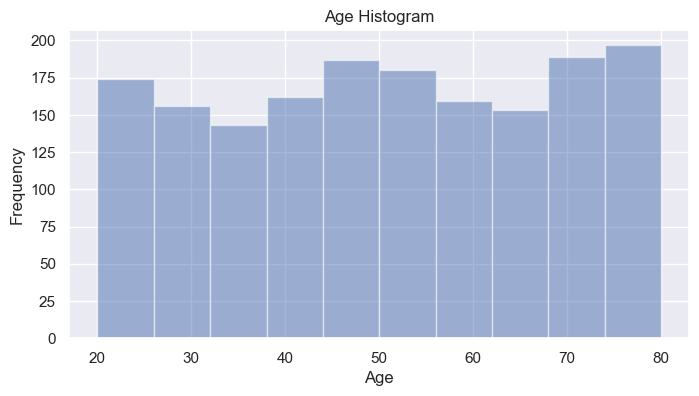

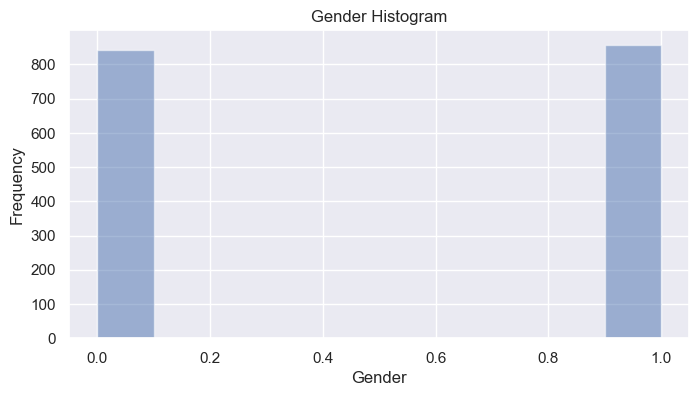

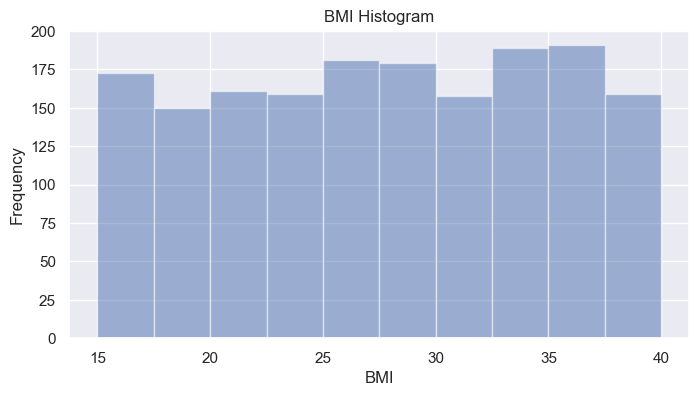

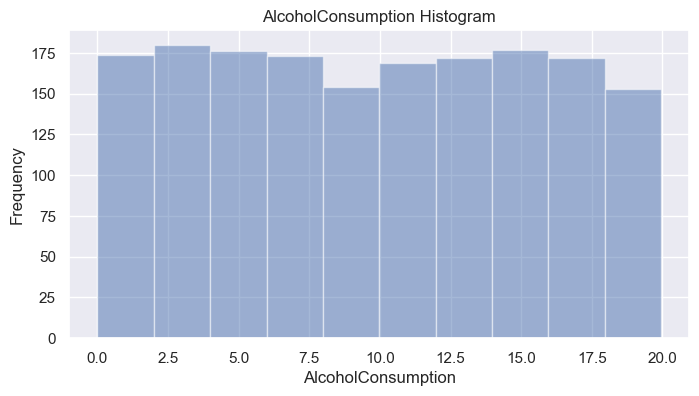

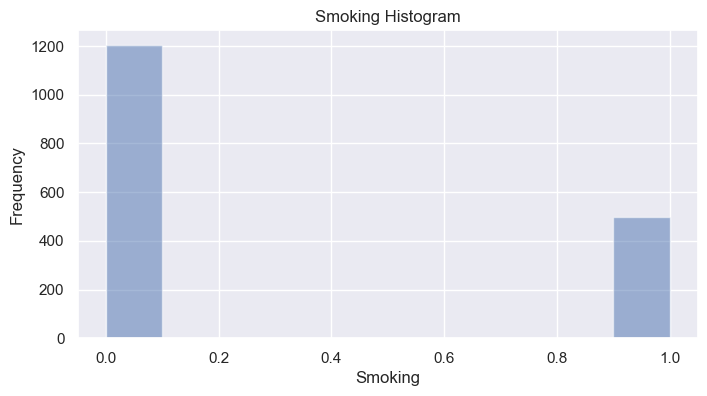

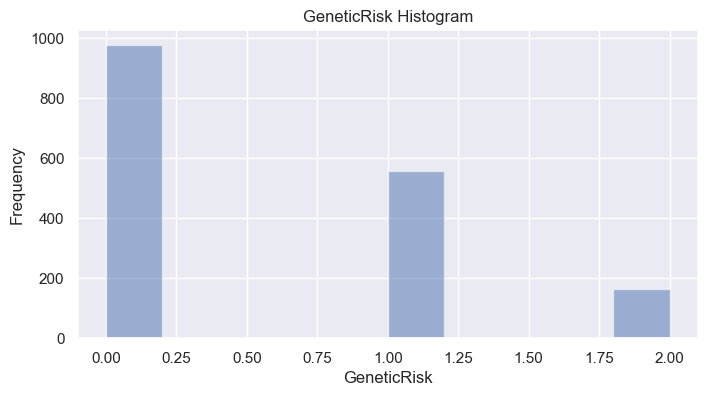

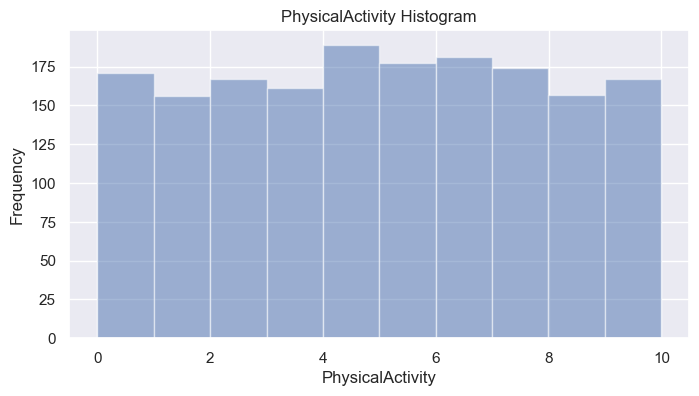

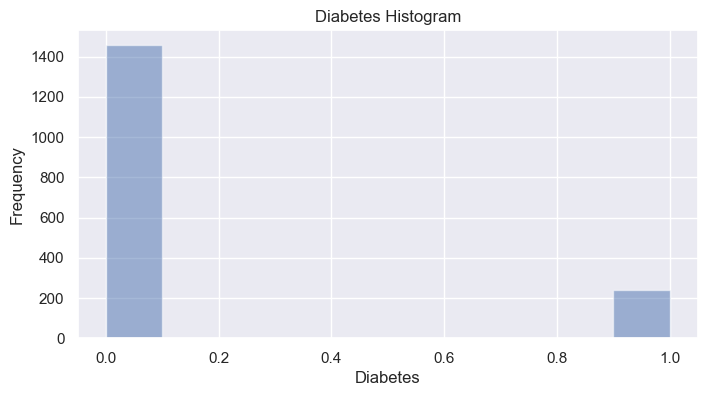

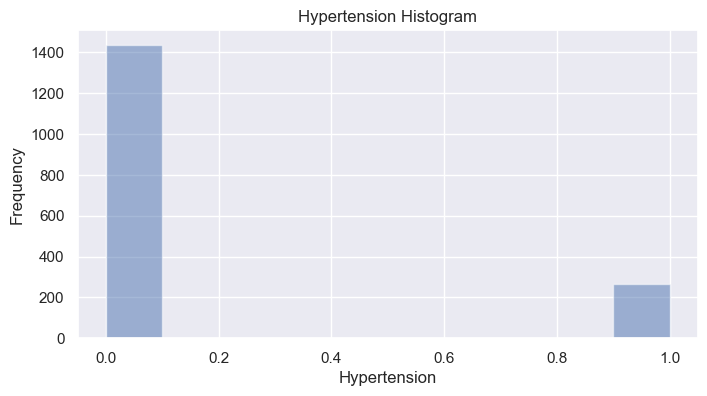

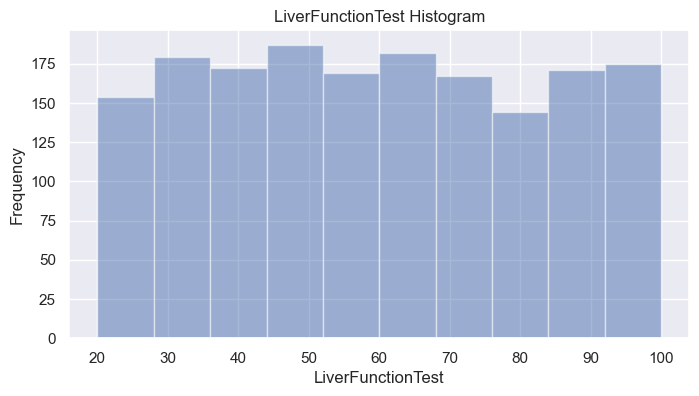

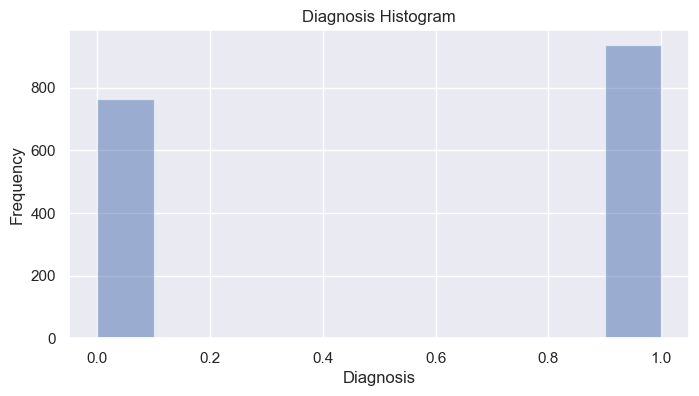

In [17]:
# Plot histograms for each feature
# Get the column names as a list
column_names = df.columns.tolist()
for i in column_names:
    df[i].plot.hist(alpha=0.5, bins=10, figsize=(8, 4), title=f"{i} Histogram")
    plt.xlabel(f"{i}")
    plt.ylabel("Frequency")
    plt.show()


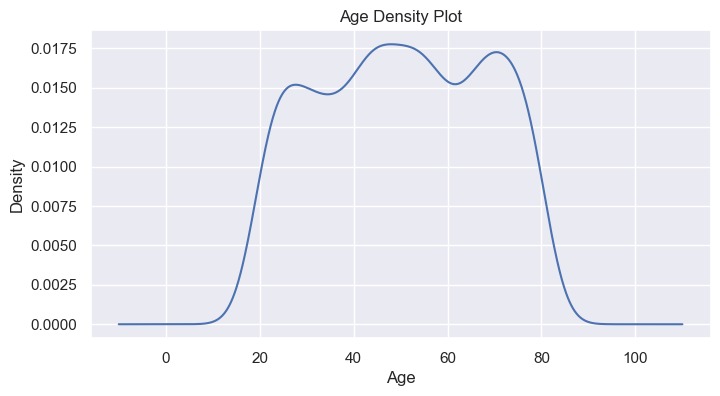

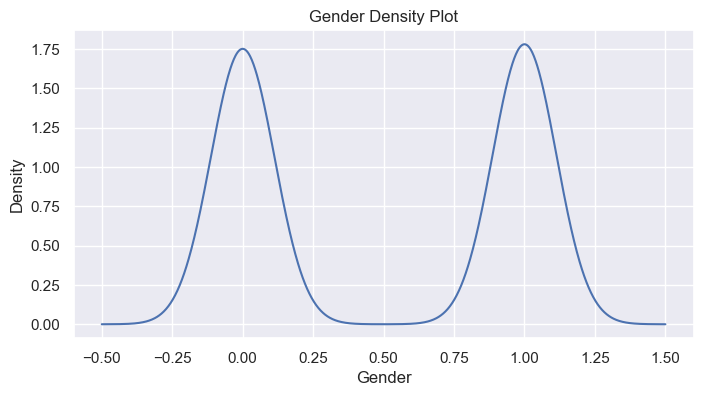

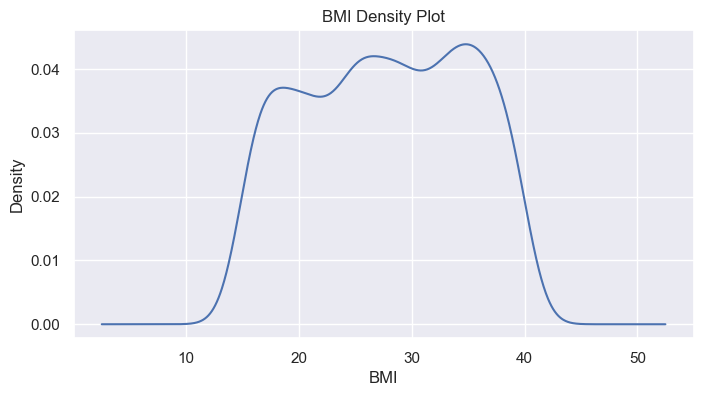

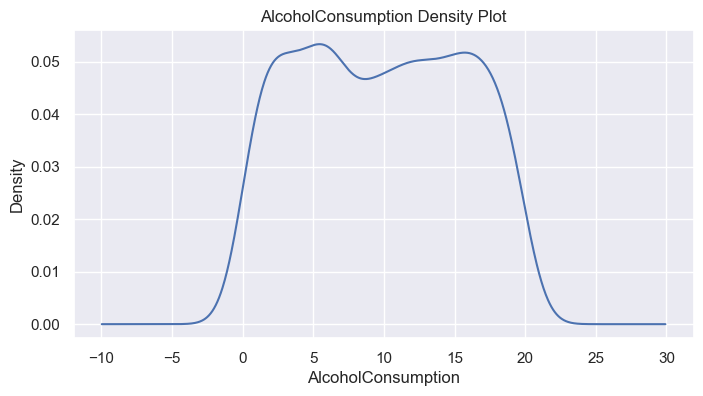

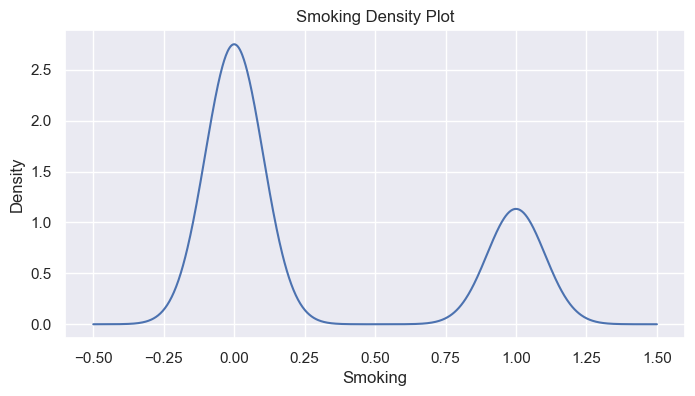

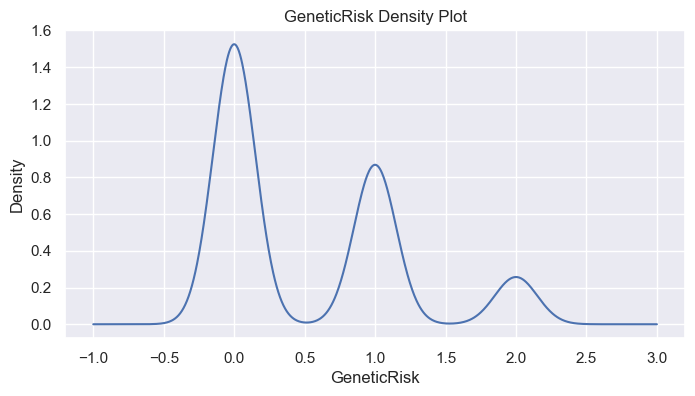

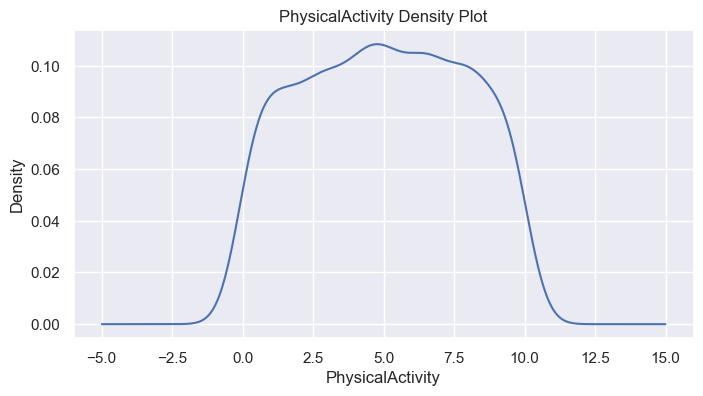

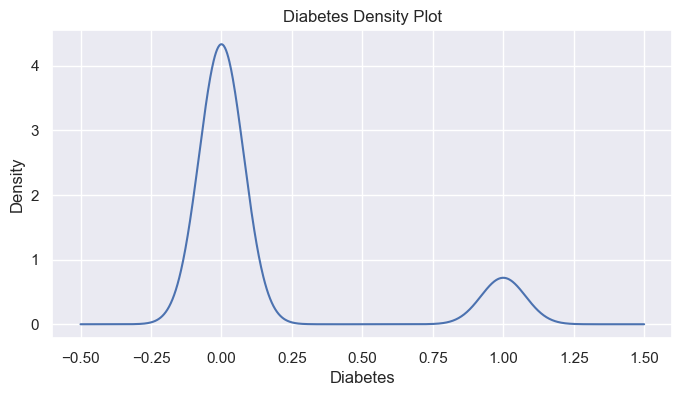

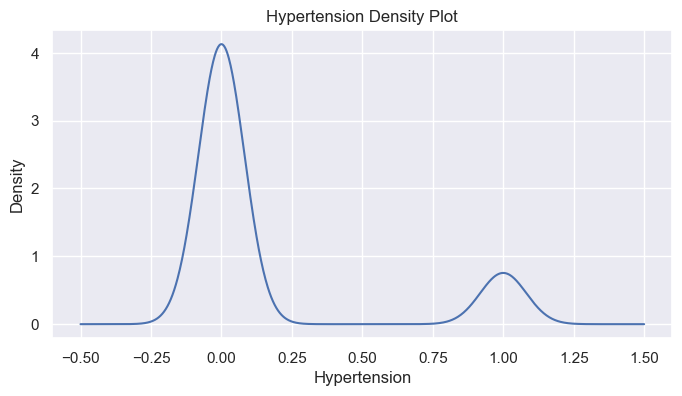

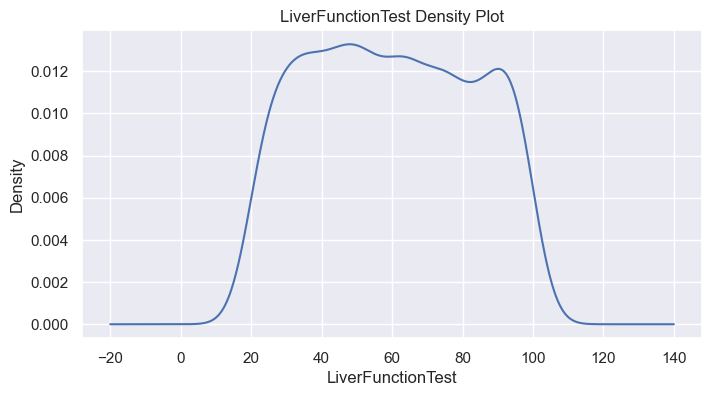

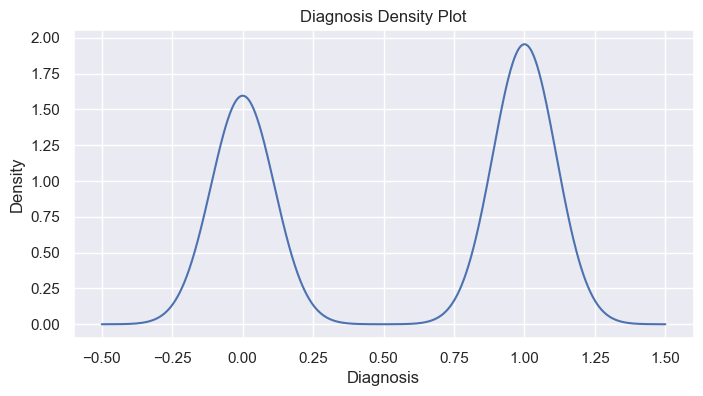

In [18]:
# Plot density plots (Kernel Density Estimation)
for i in column_names:
    df[i].plot.density(figsize=(8, 4), title=f"{i} Density Plot")
    plt.xlabel(f"{i}")
    plt.ylabel("Density")
    plt.show()

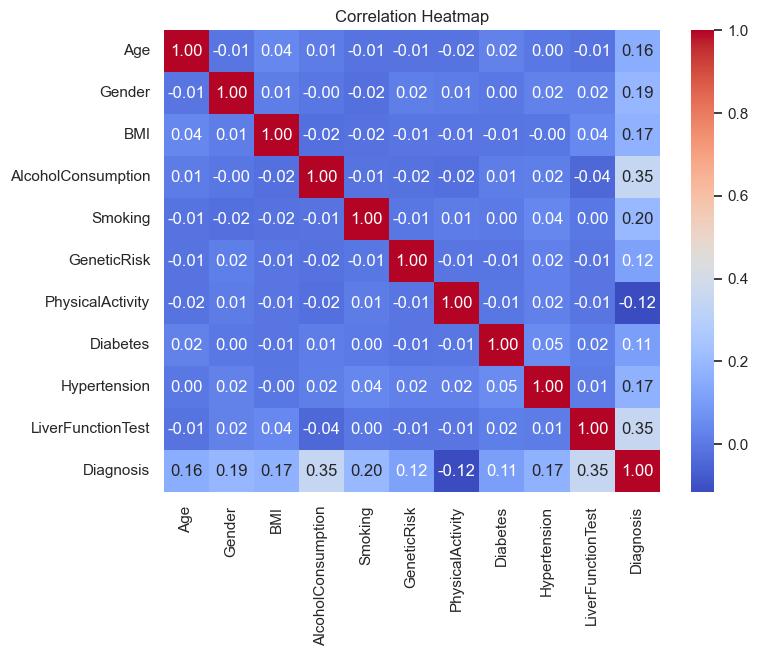

In [32]:
# Create a correlation heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [31]:
# Feature Importance
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' contains your feature matrix and 'y' is the target
y = df['Diagnosis']
cols = ['Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']
X = df[cols]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importance = rf_model.feature_importances_

# Create a list of (feature_name, importance) tuples
feature_importance_tuples = [(col, importance) for col, importance in zip(cols, feature_importance)]

# Sort by importance (descending order)
sorted_features = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

print("Feature importance (descending order):")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")


Feature importance (descending order):
LiverFunctionTest: 0.2466
AlcoholConsumption: 0.2430
BMI: 0.1134
Age: 0.1065
PhysicalActivity: 0.1004
GeneticRisk: 0.0525
Gender: 0.0465
Smoking: 0.0429
Hypertension: 0.0296
Diabetes: 0.0184


In [36]:
# Feature Engineering
df['Drug Use']=df['AlcoholConsumption']*df['Smoking']
df['Age_Physic']=df['Age']*df['PhysicalActivity']
df['Age_Physic 2']=df['Age']/df['PhysicalActivity']
df['Phy_Diab']=df['PhysicalActivity']*df['Diabetes']
df['Phy_Diab 2']=df['PhysicalActivity']/df['Diabetes']
df['Age_BMI']=df['Age']*df['BMI']
df['Phyc_BMI']=df['PhysicalActivity']/df['BMI']
df['Hyp_Diab']=df['Hypertension']*df['Diabetes']
cols_2 = ['Drug Use','Age_Physic','Age_Physic 2','Phy_Diab','Phy_Diab 2','Age_BMI','Phyc_BMI','Hyp_Diab','Age', 'Gender', 'BMI', 'AlcoholConsumption', 'Smoking', 'GeneticRisk', 'PhysicalActivity', 'Diabetes', 'Hypertension', 'LiverFunctionTest']
# Replace inf with 0
df.replace([np.inf, -np.inf], 0, inplace=True)


In [45]:
df.head(5)

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,Drug Use,Age_Physic,Age_Physic 2,Phy_Diab,Phy_Diab 2,Age_BMI,Phyc_BMI,Hyp_Diab
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1,0.0,38.218531,88.020129,0.000000,0.000000,2079.739881,0.018377,0
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1,0.0,118.609525,42.500802,1.670557,1.670557,2182.005381,0.054358,0
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0,0.0,476.558796,4.834661,0.000000,0.000000,958.627533,0.497126,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1,0.0,191.424401,6.038938,0.000000,0.000000,564.924178,0.338850,0
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1,0.0,221.105515,17.385365,3.566218,3.566218,996.081474,0.221975,0


In [44]:
# Feature Importance
# Assuming 'X' contains your feature matrix and 'y' is the target
y = df['Diagnosis']
X = df[cols_2]

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importance = rf_model.feature_importances_

# Create a list of (feature_name, importance) tuples
feature_importance_tuples = [(col, importance) for col, importance in zip(cols_2, feature_importance)]

# Sort by importance (descending order)
sorted_features = sorted(feature_importance_tuples, key=lambda x: x[1], reverse=True)

print("Feature importance (descending order):")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")


Feature importance (descending order):
LiverFunctionTest: 0.2046
AlcoholConsumption: 0.1840
Age_BMI: 0.0741
Drug Use: 0.0650
BMI: 0.0607
Age: 0.0563
Age_Physic 2: 0.0552
Phyc_BMI: 0.0541
PhysicalActivity: 0.0494
Age_Physic: 0.0449
GeneticRisk: 0.0434
Gender: 0.0387
Hypertension: 0.0211
Smoking: 0.0180
Phy_Diab 2: 0.0114
Phy_Diab: 0.0106
Diabetes: 0.0062
Hyp_Diab: 0.0022


In [48]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a DataFrame called 'df'
features_to_scale= ['Drug Use','Age_Physic','Age_Physic 2','Phy_Diab','Phy_Diab 2','Age_BMI','Phyc_BMI','Age', 'BMI', 'AlcoholConsumption', 'GeneticRisk', 'PhysicalActivity',  'LiverFunctionTest']
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected features
df_scaled = df.copy()  # Create a copy to avoid modifying the original data
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df_scaled.head(5)


,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,Drug Use,Age_Physic,Age_Physic 2,Phy_Diab,Phy_Diab 2,Age_BMI,Phyc_BMI,Hyp_Diab
0,0.431253,0,1.131724,1.292704,0,0.718000,-1.525542,0,0,-0.745107,1,-0.524746,-1.226569,0.116646,-0.345348,-0.345348,1.069719,-1.374045,0
1,1.168351,1,0.420720,-1.325806,0,0.718000,-1.170119,1,0,0.323885,1,-0.524746,-0.763718,-0.008930,0.472978,0.472978,1.230839,-1.094639,0
2,-0.135746,0,-1.072155,1.506075,0,-0.783353,1.731169,0,0,0.168559,0,-0.524746,1.297175,-0.112841,-0.345348,-0.345348,-0.696607,2.343579,0
3,-0.929544,1,-1.537730,0.486565,0,-0.783353,0.221042,0,0,0.204093,1,-0.524746,-0.344486,-0.109519,-0.345348,-0.345348,-1.316891,1.114519,0
4,0.658052,1,-1.613973,-1.519255,0,0.718000,-0.504096,1,0,0.783176,1,-0.524746,-0.173597,-0.078217,1.401572,1.401572,-0.637598,0.206956,0


In [51]:
#Handling Class Imbalance
# Assuming df_scaled is your original DataFrame
class_counts = df_scaled['Diagnosis'].value_counts()
min_class_size = class_counts.min()

# Randomly sample from each class
balanced_df = pd.concat([df_scaled[df_scaled['Diagnosis'] == label].sample(min_class_size)
                         for label in class_counts.index])

# Shuffle the rows (optional)
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)
balanced_df.head(5)

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis,Drug Use,Age_Physic,Age_Physic 2,Phy_Diab,Phy_Diab 2,Age_BMI,Phyc_BMI,Hyp_Diab
0,0.431253,1,0.789070,0.738277,0,-0.783353,1.515917,0,0,1.127213,1,-0.524746,1.664209,-0.109003,-0.345348,-0.345348,0.844016,0.649885,0
1,0.034353,1,-1.034054,0.976065,0,2.219353,0.822048,0,0,-1.645184,1,-0.524746,0.708866,-0.107012,-0.345348,-0.345348,-0.580143,1.298761,0
2,1.621950,1,-0.240881,-0.983454,1,0.718000,0.079384,0,0,-1.222733,0,0.248076,0.930821,-0.084483,-0.345348,-0.345348,1.024618,0.046554,0
3,-0.079046,1,0.921408,-0.056394,0,-0.783353,-0.212363,0,0,-1.116424,0,-0.524746,-0.206266,-0.095432,-0.345348,-0.345348,0.444236,-0.522599,0
4,1.395150,0,1.508653,-1.671787,0,-0.783353,0.407531,0,0,-0.658007,0,-0.524746,1.213751,-0.092595,-0.345348,-0.345348,2.351169,-0.276516,0


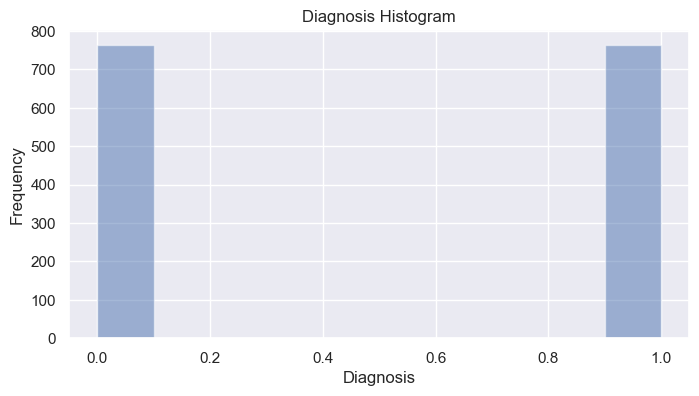

In [53]:
balanced_df['Diagnosis'].plot.hist(alpha=0.5, bins=10, figsize=(8, 4), title=f"{i} Histogram")
plt.xlabel("Diagnosis")
plt.ylabel("Frequency")
plt.show()

In [54]:
balanced_df.shape

(1528, 19)

# Model Creation

In [55]:
# Logistic Regression Model
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Load your dataset
X=balanced_df.drop('Diagnosis', axis=1)
y=balanced_df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)


Precision: 0.8267675225452201
Recall: 0.826797385620915
F1-score: 0.8267027566201617
AUC-ROC: 0.825984589041096


In [56]:
# Gridsearch cv for SVM model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



# Define the hyperparameter grid
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

# Create an SVM model
svm_model = SVC()

# Perform grid search with F1-score as the scoring metric
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best F1-score:", best_score)


Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best F1-score: 0.8363093191560941


In [57]:
# SVM Model
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Load your dataset 
X=balanced_df.drop('Diagnosis', axis=1)
y=balanced_df['Diagnosis']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model with specified hyperparameters
svm_model = SVC(C=1, gamma=0.1, kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", roc_auc)


Precision: 0.8267675225452201
Recall: 0.826797385620915
F1-score: 0.8267027566201617
AUC-ROC: 0.825984589041096
